<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Analysis with Python

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Explore features or charecteristics to predict columns


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Import Data from Module</a></li>
    <li><a href="https://#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="https://#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="https://#basic_grouping">Basics of Grouping</a></li>
    <li><a href="https://#correlation_causation">Correlation and Causation</a></li>
    <li><a href="https://#anova">ANOVA</a></li>
</ol>

</div>

<hr>


<h3>What are the main characteristics that have the most impact on the car price?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


<h4>Setup</h4>


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])
# await piplite.install(['scipy'])
# await piplite.install(['seaborn'])


Import libraries:


If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y

In [3]:
import pandas as pd
import numpy as np

This function will download the dataset into your browser


In [4]:
#This function will download the dataset into your browser

# from pyodide.http import pyfetch
#
# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())


Load the data and store it in dataframe `df`:


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [5]:
path='clean_df.csv'

you will need to download the dataset; if you are running locally, please comment out the following


\#you will need to download the dataset; if you are running locally, please comment out the following
await download(path, "auto.csv")
path="auto.csv"


In [6]:
# await download(path, "auto.csv")
# filename="auto.csv"

In [7]:

df = pd.read_csv(path)
df.head()

,Unnamed: 0,EncounterId,PatientNbr,Race,Gender,Age,Weight,AdmissionTypeId,DischargeDispositionId,AdmissionSourceId,...,Metformin-pioglitazone,DiabetesMedication,Readmitted,ages-binned,change_yes,change_no,Increased,No,Steady,Decreased
0,0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,False,NO,Child,0,1,0,1,0,0
1,1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,True,>30,Child,1,0,0,1,0,0
2,2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,True,NO,Young Adults,0,1,0,1,0,0
3,3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,True,NO,Middle-Aged Adults,1,0,0,1,0,0
4,4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,True,NO,Middle-Aged Adults,1,0,0,1,0,0


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


To install Seaborn we use pip, the Python package manager.


Import visualization packages "Matplotlib", "Seaborn" and "Dython". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
%matplotlib inline

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [9]:
# list the data types for each column
print(df.dtypes)

Unnamed: 0                    int64
EncounterId                   int64
PatientNbr                    int64
Race                         object
Gender                       object
Age                          object
Weight                       object
AdmissionTypeId               int64
DischargeDispositionId        int64
AdmissionSourceId             int64
TimeInHospital                int64
PayerCode                    object
MedicalSpecialty             object
NumLabProcedures            float64
NumProcedures                 int64
NumMedications                int64
NumberOutpatient              int64
NumberEmergency               int64
NumberInpatient               int64
Diagnosis1                   object
Diagnosis2                   object
Diagnosis3                   object
NumberDiagnoses             float64
MaxGluSerum                  object
A1Cresult                    object
Metformin                    object
Repaglinide                  object
Nateglinide                 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "NumMedications"? </b>

</div>


In [10]:
# Write your code below and press Shift+Enter to execute

dtype('int64')

<details><summary>Click here for the solution</summary>

```python
df['NumMedications'].dtypes
```

</details>


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr".
Also, we can find association between objects/categories and correlation (int64 or float64) using associations from dython.nominal.

C:\Users\s\AppData\Local\Temp\ipykernel_24256\2013331542.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


                        Unnamed: 0  EncounterId  PatientNbr  AdmissionTypeId  \
Unnamed: 0                1.000000     0.967811    0.527170        -0.164707   
EncounterId               0.967811     1.000000    0.512027        -0.158898   
PatientNbr                0.527170     0.512027    1.000000        -0.011062   
AdmissionTypeId          -0.164707    -0.158898   -0.011062         1.000000   
DischargeDispositionId   -0.147778    -0.132869   -0.136744         0.083411   
AdmissionSourceId        -0.136904    -0.112487   -0.032641         0.106753   
TimeInHospital           -0.066272    -0.062267   -0.024129        -0.012486   
NumLabProcedures         -0.023444    -0.026036    0.015841        -0.143732   
NumProcedures            -0.019350    -0.014214   -0.015605         0.129870   
NumMedications            0.082677     0.076151    0.020628         0.079529   
NumberOutpatient          0.117342     0.103720    0.103352         0.026529   
NumberEmergency           0.091349     0

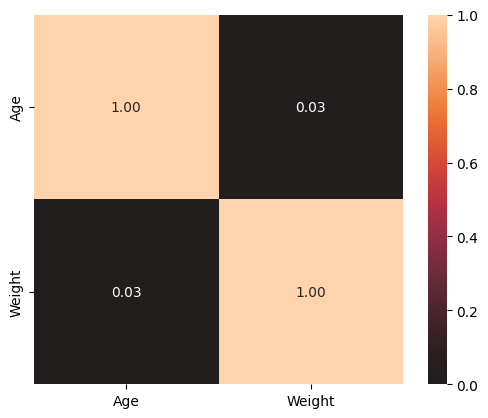

{'corr':              Age    Weight
Age     1.000000  0.025992
Weight  0.025992  1.000000, 'ax': <AxesSubplot: >}


In [11]:
print(df.corr())
#As an example we will select "Age" and "Weight" columns
print(associations(df[['Age','Weight']]))

The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: TimeInHospital, NumProcedures, Age, NumMedications, DiabetesMedication and Insulin.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[['TimeInHospital','NumProcedures']. For int64 and float64, you can use associations instead of.corr(). It works the same way.</p>
</div>


In [12]:
# Write your code below and press Shift+Enter to execute

<details><summary>Click here for the solution</summary>

```python
#example with .corr()
print(df[["TimeInHospital","NumProcedures"]].corr())
#example with associations()
print(associations(df[['TimeInHospital','NumProcedures','Age', 'NumMedications', 'DiabetesMedication','Insulin']]))
```
</details>

As we can notice, most of the columns have values < 0.5, but there is nothing to be worried about. This is normal correlation for medical data, because it is difficult to predict.

<h2>Continuous Numerical Variables:</h2>

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>


Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "NumLabProcedures" and "NumMedications".


(0.0, 85.0)

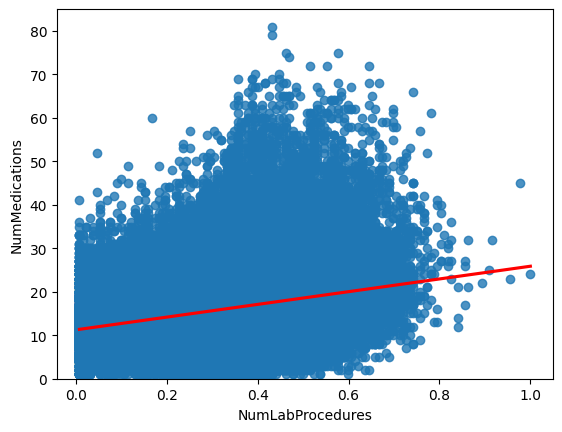

In [13]:
sns.regplot(x="NumLabProcedures", y="NumMedications", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<p>As the NumLabProcedures goes up, the NumMedications goes up: this indicates a positive direct correlation between these two variables.</p>


We can examine the correlation between 'NumLabProcedures' and 'NumMedications' and see that it's approximately 0.26.


In [14]:
df[["NumLabProcedures","NumMedications"]].corr()

,NumLabProcedures,NumMedications
NumLabProcedures,1.000000,0.268149
NumMedications,0.268149,1.000000


NumLabProcedures is a potential predictor variable of NumMedications. Let's find the scatterplot of "hNumberEmergency" and "NumLabProcedures".

<AxesSubplot: xlabel='NumberEmergency', ylabel='NumLabProcedures'>

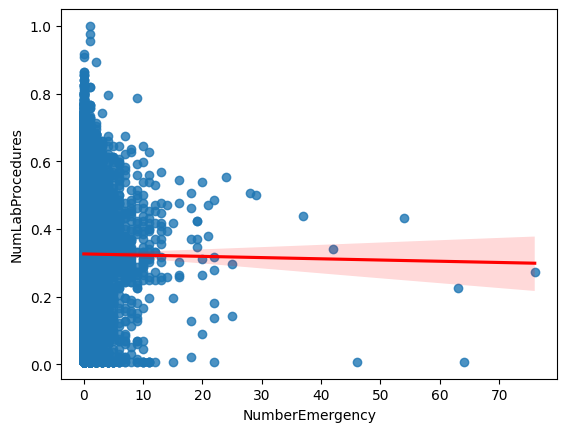

In [15]:
sns.regplot(x="NumberEmergency", y="NumLabProcedures", data=df, line_kws={"color": "red"})

<p>As NumberEmergency goes up, the NumLabProcedures goes down: this indicates an inverse/negative relationship between these two variables. NumberEmergency could potentially be a predictor of NumLabProcedures.</p>

We can examine the correlation between 'NumberEmergency' and 'NumLabProcedures' and see it's approximately -0.002252.


In [16]:
df[['NumberEmergency', 'NumLabProcedures']].corr()

,NumberEmergency,NumLabProcedures
NumberEmergency,1.000000,-0.002252
NumLabProcedures,-0.002252,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "Age" is a predictor variable of "Weight".


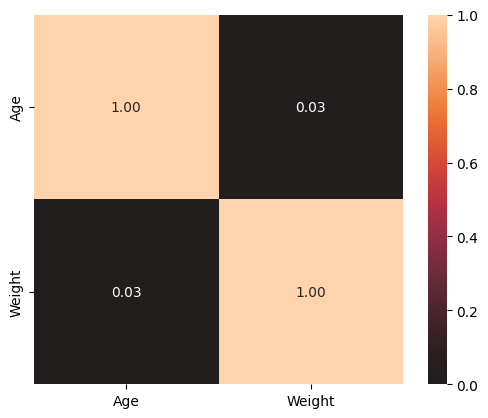

{'corr':              Age    Weight
 Age     1.000000  0.025992
 Weight  0.025992  1.000000,
 'ax': <AxesSubplot: >}

In [17]:
associations(df[["Age","Weight"]])

<p>According to heatmap Age does not seem like a good predictor of the Weight at all.

As we can notice the correlation between 'Age' and 'Weight' approximately 0.03.


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="NumberInpatient" and y="NumberEmergency".</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["NumberInpatient","NumberEmergency"]].  </p>
</div>


In [18]:
# Write your code below and press Shift+Enter to execute

,NumberInpatient,NumberEmergency
NumberInpatient,1.0000,0.2666
NumberEmergency,0.2666,1.0000


<details><summary>Click here for the solution</summary>

```python

df[['NumberInpatient', 'NumberEmergency']].corr()

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "NumberInpatient" and "NumberEmergency", do you expect a linear relationship?</p>
<p>Verify your results using the function "regplot()".</p>
</div>


<AxesSubplot: xlabel='NumberInpatient', ylabel='NumberEmergency'>

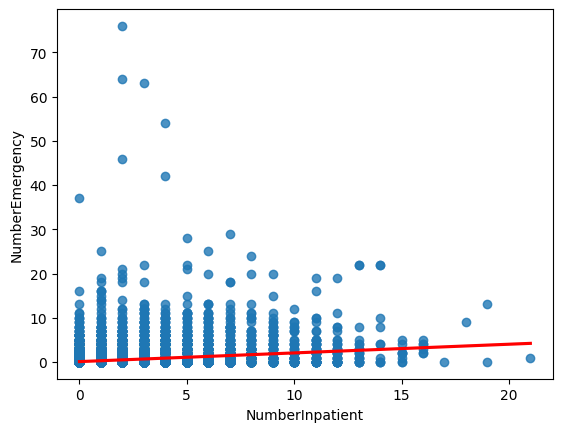

In [19]:
# Write your code below and press Shift+Enter to execute

<details><summary>Click here for the solution</summary>

```python
#There is a weak correlation between the variable 'NumberInpatient' and 'NumberEmergency.' as such regression will not work well. We can see this using "regplot" to demonstrate this.
#Code:
sns.regplot(x="NumberInpatient", y="NumberEmergency", data=df, line_kws={"color": "red"})

```
</details>


<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "Weight" and "NumProcedures".


AxesSubplot(0.125,0.11;0.775x0.77)


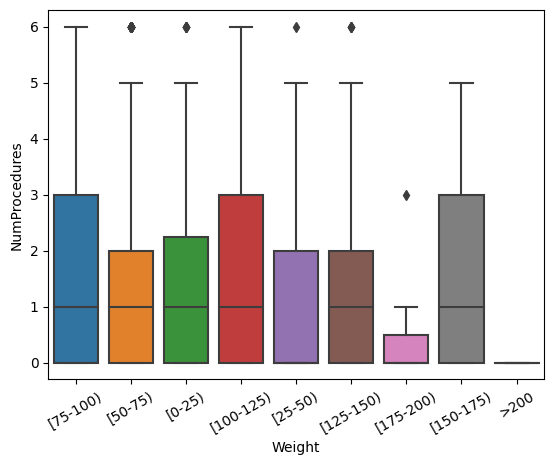

In [20]:
ax = sns.boxplot(x="Weight", y="NumProcedures", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
print(ax)

<p>We see that the distributions of price between the different NumProcedures categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "Age" and "NumProcedures".</p>


AxesSubplot(0.125,0.11;0.775x0.77)


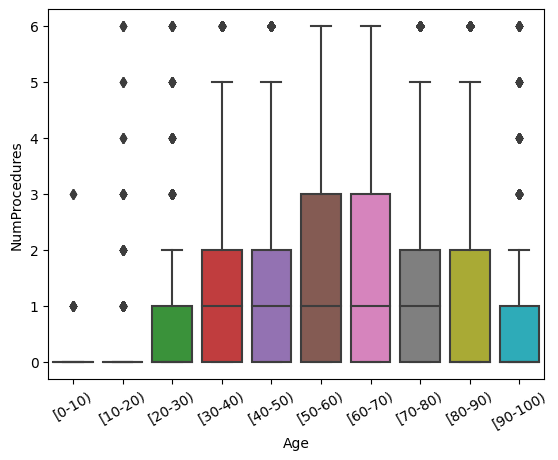

In [21]:
ax = sns.boxplot(x="Age", y="NumProcedures", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
print(ax)

<p>Here we see that the distribution of NumProcedures between Age categories, are distinct enough to take Age as a potential good predictor of NumProcedures.</p>


Let's examine "TimeInHospital" and "NumMedications".


<AxesSubplot: xlabel='TimeInHospital', ylabel='NumMedications'>

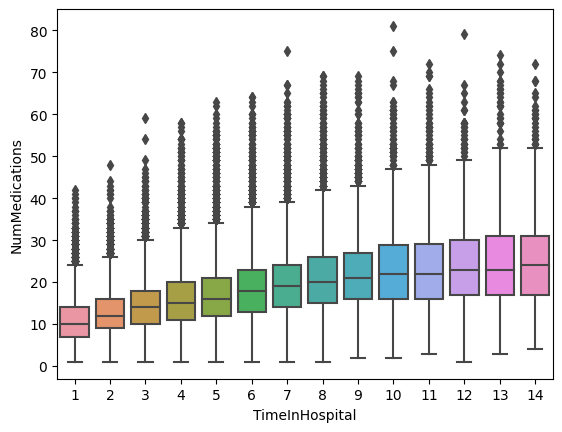

In [22]:
sns.boxplot(x="TimeInHospital", y="NumMedications", data=df)

<p>Here we see that the distribution of NumMedications between the different TimeInHospital categories differs. As such, TimeInHospital could potentially be a predictor of NumMedications.</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li>
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "describe" as follows:


In [23]:
df.describe()

,Unnamed: 0,EncounterId,PatientNbr,AdmissionTypeId,DischargeDispositionId,AdmissionSourceId,TimeInHospital,NumLabProcedures,NumProcedures,NumMedications,NumberOutpatient,NumberEmergency,NumberInpatient,NumberDiagnoses,change_yes,change_no,Increased,No,Steady,Decreased
count,101745.000000,1.017450e+05,1.017450e+05,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000,101745.000000
mean,50872.000000,1.652090e+08,5.433508e+07,2.024011,3.715259,5.754720,4.396088,0.326493,1.339879,16.022271,0.369404,0.197828,0.635510,0.463919,0.461969,0.538031,0.000855,0.937471,0.059924,0.001749
std,29371.395907,1.026392e+08,3.869649e+07,1.445436,5.279940,4.064055,2.985306,0.149047,1.705914,8.127941,1.267374,0.930537,1.262895,0.120853,0.498554,0.498554,0.029229,0.242115,0.237348,0.041790
min,0.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,0.007576,0.000000,1.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25436.000000,8.496543e+07,2.341348e+07,1.000000,1.000000,1.000000,2.000000,0.234848,0.000000,10.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,50872.000000,1.523897e+08,4.550679e+07,1.000000,1.000000,7.000000,4.000000,0.333333,1.000000,15.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,76308.000000,2.302720e+08,8.754689e+07,3.000000,4.000000,7.000000,6.000000,0.431818,2.000000,20.000000,0.000000,0.000000,1.000000,0.562500,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,101744.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,1.000000,6.000000,81.000000,42.000000,76.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [24]:
df.describe(include=['object'])

,Race,Gender,Age,Weight,PayerCode,MedicalSpecialty,Diagnosis1,Diagnosis2,Diagnosis3,MaxGluSerum,...,Examide,Citoglipton,Insulin,Glyburide-metformin,Glipizide-metformin,Glimepiride-pioglitazone,Metformin-rosiglitazone,Metformin-pioglitazone,Readmitted,ages-binned
count,101745,101745,101745,3197,101745,101745,101745,101745,101745,101745,...,101745,101745,101745,101745,101745,101745,101745,101745,101745,101745
unique,5,3,10,9,17,72,716,748,789,4,...,1,1,4,4,2,2,2,2,3,4
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,None,...,No,No,No,No,No,No,No,No,NO,Old-Aged Adults
freq,78363,54703,26064,1336,72677,64572,6862,7106,12976,96400,...,101745,101745,47371,101039,101732,101744,101743,101744,54852,85779


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "MedicalSpecialty". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['MedicalSpecialty]</code>, not two brackets <code>df[['MedicalSpecialty']]</code>.</p>


In [25]:
df['MedicalSpecialty'].value_counts()

InternalMedicine                    64572
Emergency/Trauma                     7564
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Perinatology                            1
Neurophysiology                         1
Psychiatry-Addictive                    1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: MedicalSpecialty, Length: 72, dtype: int64

We can convert the series to a dataframe as follows:


In [26]:
df['MedicalSpecialty'].value_counts().to_frame()

,MedicalSpecialty
InternalMedicine,64572
Emergency/Trauma,7564
Family/GeneralPractice,7440
Cardiology,5352
Surgery-General,3099
...,...
Perinatology,1
Neurophysiology,1
Psychiatry-Addictive,1
Pediatrics-InfectiousDiseases,1


Let's repeat the above steps but save the results to the dataframe "MedicalSpecialty" and rename the column  'drive-wheels' to 'value_counts'.


In [27]:
medical_seciality_counts = df['MedicalSpecialty'].value_counts().to_frame()
medical_seciality_counts.rename(columns={'MedicalSpecialty': 'value_counts'}, inplace=True)
medical_seciality_counts

,value_counts
InternalMedicine,64572
Emergency/Trauma,7564
Family/GeneralPractice,7440
Cardiology,5352
Surgery-General,3099
...,...
Perinatology,1
Neurophysiology,1
Psychiatry-Addictive,1
Pediatrics-InfectiousDiseases,1


Now let's rename the index to 'drive-wheels':


In [28]:
medical_seciality_counts.index.name = 'medical-speciality'
medical_seciality_counts

,value_counts
medical-speciality,
InternalMedicine,64572
Emergency/Trauma,7564
Family/GeneralPractice,7440
Cardiology,5352
Surgery-General,3099
...,...
Perinatology,1
Neurophysiology,1
Psychiatry-Addictive,1


We can repeat the above process for the variable 'PayerCode'.


In [29]:
# engine-location as variable
payer_code_counts = df['PayerCode'].value_counts().to_frame()
payer_code_counts.rename(columns={'PayerCode': 'value_counts'}, inplace=True)
payer_code_counts.index.name = 'payer-code'
payer_code_counts.head(10)

,value_counts
payer-code,
MC,72677
HM,6273
SP,5007
BC,4655
MD,3532
CP,2533
UN,2448
CM,1936
OG,1032


<p>After examining the value counts of the PayerCode location, we see that payer code would not be a good predictor variable for the medical speciality.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "Insulin". We see that there are 4 different categories of Insulin.</p>


In [30]:
df['Insulin'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "Insulin" and then average them.</p>

<p>We can select the columns 'Insulin', 'NumMedications' and 'DiabetesMedication', then assign it to the variable "df_group_one".</p>


In [31]:
df_group_one = df[['NumMedications','Insulin','DiabetesMedication']]

We can then calculate the average price for each of the different categories of data.


In [32]:
# grouping results
df_group_one = df_group_one.groupby(['Insulin'],as_index=False).mean()
df_group_one

,Insulin,NumMedications,DiabetesMedication
0,Down,19.018991,1.00000
1,No,14.209770,0.50609
2,Steady,16.294005,1.00000
3,Up,19.634379,1.00000


<p>From our data, it seems "Down" and "Up" patients are, given the most amount of medicine, while "No" and "Steady" are approximately the same in number medications.</p>

<p>You can also group by multiple variables. For example, let's group by both 'Insulin' and 'DiabetesMedication'. This groups the dataframe by the unique combination of 'Insulin' and 'DiabetesMedication'. We can store the results in the variable 'grouped_test1'.</p>


In [33]:
# grouping results
df_gptest = df[['NumMedications','Insulin','DiabetesMedication']]
grouped_test1 = df_gptest.groupby(['Insulin','DiabetesMedication'],as_index=False).mean()
grouped_test1

,Insulin,DiabetesMedication,NumMedications
0,Down,True,19.018991
1,No,False,13.242937
2,No,True,15.153333
3,Steady,True,16.294005
4,Up,True,19.634379


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the Insulin variable as the rows of the table, and pivot DiabetesMedication to become the columns of the table:</p>


In [34]:
grouped_pivot = grouped_test1.pivot(index='Insulin',columns='DiabetesMedication')
grouped_pivot

NumMedications           
DiabetesMedication          False      True 
Insulin                                     
Down                          NaN  19.018991
No                      13.242937  15.153333
Steady                        NaN  16.294005
Up                            NaN  19.634379

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.

In [35]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

NumMedications           
DiabetesMedication          False      True 
Insulin                                     
Down                     0.000000  19.018991
No                      13.242937  15.153333
Steady                   0.000000  16.294005
Up                       0.000000  19.634379

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "NumMedications" of each car based on "Insulin".</p>
</div>


In [36]:
# Write your code below and press Shift+Enter to execute

,Insulin,NumMedications
0,Down,19.018991
1,No,14.209770
2,Steady,16.294005
3,Up,19.634379


<details><summary>Click here for the solution</summary>

```python
# grouping results

df_gptest2 = df[['Insulin','NumMedications']]
grouped_test_bodystyle = df_gptest2.groupby(['Insulin'],as_index= False).mean()
grouped_test_bodystyle


```

</details>


If you did not import "pyplot", let's do it again.


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

<h4>Variables: NumMedications and Insulin vs. DiabetesMedication</h4>


Let's use a heat map to visualize the relationship between Insulin vs DiabetesMedication.


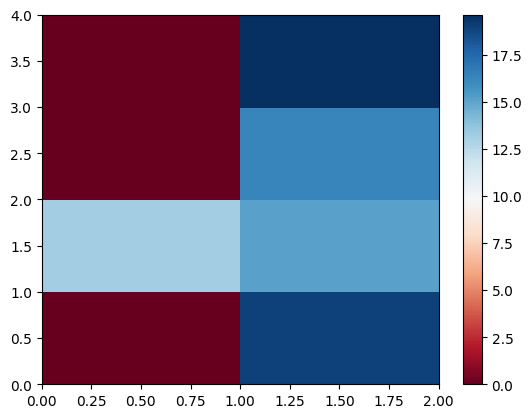

In [38]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


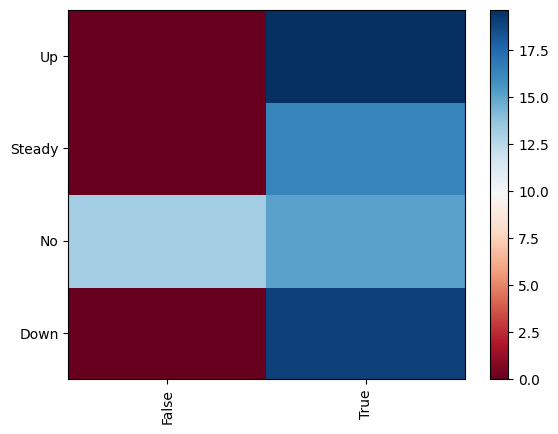

In [39]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "How can we use columns to predict other columns?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables. In other words: how is the column dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.</p>


In [40]:
df.corr()

C:\Users\s\AppData\Local\Temp\ipykernel_24256\947522479.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,EncounterId,PatientNbr,AdmissionTypeId,DischargeDispositionId,AdmissionSourceId,TimeInHospital,NumLabProcedures,NumProcedures,NumMedications,...,NumberEmergency,NumberInpatient,NumberDiagnoses,DiabetesMedication,change_yes,change_no,Increased,No,Steady,Decreased
Unnamed: 0,1.000000,0.967811,0.527170,-0.164707,-0.147778,-0.136904,-0.066272,-0.023444,-0.019350,0.082677,...,0.091349,0.036221,0.278626,0.058262,0.111152,-0.111152,-0.008682,0.038581,-0.035814,-0.014047
EncounterId,0.967811,1.000000,0.512027,-0.158898,-0.132869,-0.112487,-0.062267,-0.026036,-0.014214,0.076151,...,0.082756,0.030985,0.265148,0.051783,0.096416,-0.096416,-0.008362,0.049700,-0.046969,-0.015333
PatientNbr,0.527170,0.512027,1.000000,-0.011062,-0.136744,-0.032641,-0.024129,0.015841,-0.015605,0.020628,...,0.062321,0.012498,0.226842,0.017163,0.054861,-0.054861,-0.002075,0.006695,-0.005814,-0.004318
AdmissionTypeId,-0.164707,-0.158898,-0.011062,1.000000,0.083411,0.106753,-0.012486,-0.143732,0.129870,0.079529,...,-0.019082,-0.038118,-0.117079,-0.000246,0.007262,-0.007262,0.007656,-0.022306,0.021074,0.004186
DischargeDispositionId,-0.147778,-0.132869,-0.136744,0.083411,1.000000,0.018227,0.162754,0.023418,0.015952,0.108808,...,-0.024457,0.020768,0.047010,-0.028798,-0.012278,0.012278,0.003170,0.004855,-0.005693,0.001990
AdmissionSourceId,-0.136904,-0.112487,-0.032641,0.106753,0.018227,1.000000,-0.006997,0.048837,-0.135441,-0.054515,...,0.059859,0.036319,0.072029,0.001541,0.002469,-0.002469,-0.002040,0.009345,-0.009553,0.001543
TimeInHospital,-0.066272,-0.062267,-0.024129,-0.012486,0.162754,-0.006997,1.000000,0.318464,0.191475,0.466136,...,-0.009675,0.073610,0.220191,0.062515,0.109131,-0.109131,0.013577,-0.005740,-0.000818,0.028401
NumLabProcedures,-0.023444,-0.026036,0.015841,-0.143732,0.023418,0.048837,0.318464,1.000000,0.058066,0.268149,...,-0.002252,0.039226,0.152779,0.033054,0.063911,-0.063911,0.005633,0.010350,-0.013710,0.013959
NumProcedures,-0.019350,-0.014214,-0.015605,0.129870,0.015952,-0.135441,0.191475,0.058066,1.000000,0.385767,...,-0.038178,-0.066208,0.073738,-0.006803,0.004457,-0.004457,0.007772,-0.014270,0.013272,0.001861
NumMedications,0.082677,0.076151,0.020628,0.079529,0.108808,-0.054515,0.466136,0.268149,0.385767,1.000000,...,0.013195,0.064173,0.261537,0.186865,0.246786,-0.246786,0.011131,-0.053043,0.049594,0.017854


Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [41]:
from scipy import stats

<h3>NumberInpatient vs. NumberEmergency</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'NumberInpatient' and 'NumberEmergency'.


In [42]:
pearson_coef, p_value = stats.pearsonr(df['NumberInpatient'], df['NumberEmergency'])
print("The Pearson Correlation Coefficient is", round(pearson_coef,2), " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.27  with a P-value of P = 0.0


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.27).</p>


<h3>NumLabProcedures vs. NumMedications</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'NumLabProcedures' and 'NumMedications'.


In [43]:
pearson_coef, p_value = stats.pearsonr(df['NumLabProcedures'], df['NumMedications'])
print("The Pearson Correlation Coefficient is",  round(pearson_coef,2), " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.27  with a P-value of P =  0.0


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between NumLabProcedures and NumMedications is statistically significant, although the linear relationship isn't extremely strong (~0.27).</p>


<h3>NumberOutpatient vs. NumberEmergency</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'NumberOutpatient' and 'NumberEmergency'.


In [44]:
pearson_coef, p_value = stats.pearsonr(df['NumberOutpatient'], df['NumberEmergency'])
print("The Pearson Correlation Coefficient is", round(pearson_coef,2), " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.09  with a P-value of P =  9.484096344226214e-188


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is not strong (~0.09).</p>


<h3>Width vs. Price</h3>


Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [45]:
pearson_coef, p_value = stats.pearsonr(df['NumberInpatient'], df['NumberEmergency'])
print("The Pearson Correlation Coefficient is", round(pearson_coef,2), " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.27  with a P-value of P = 0.0


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship isn't extremely strong (~0.27).

<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>NumMedications</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'NumMedications' impact  'Insulin', we group the data.</p>


In [46]:
grouped_test2=df[['Insulin','NumMedications']].groupby(['Insulin'])
grouped_test2.head(2)

,Insulin,NumMedications
0,No,1
1,Up,18
2,No,13
3,Up,16
4,Steady,8
5,Steady,16
12,Down,15
20,Down,19


In [47]:
grouped_test2

We can obtain the values of the method group using the method "get_group".


In [48]:
grouped_test2.get_group('Up')['NumMedications']


1         18
3         16
15        13
48        19
62        15
          ..
101730    65
101734    26
101737    22
101738    15
101743    21
Name: NumMedications, Length: 11315, dtype: int64

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [49]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Up')['NumMedications'],grouped_test2.get_group('No')['NumMedications'], grouped_test2.get_group('Down')['NumMedications'])

print( "ANOVA results: F=", round(f_val,2), ", P =", p_val)

ANOVA results: F= 3294.02 , P = 0.0



This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


#### Up and Down

In [50]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Up')['NumMedications'], grouped_test2.get_group('Down')['NumMedications'])

print( "ANOVA results: F=", round(f_val,2), ", P =", p_val )

ANOVA results: F= 25.76 , P = 3.8881767310355405e-07


Let's examine the other groups.


#### No and Up


In [51]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('No')['NumMedications'], grouped_test2.get_group('Up')['NumMedications'])

print( "ANOVA results: F=", round(f_val,2), ", P =", p_val)

ANOVA results: F= 4561.21 , P = 0.0


<h4>No and Down</h4>


In [52]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('No')['NumMedications'], grouped_test2.get_group('Down')['NumMedications'])

print("ANOVA results: F=", round(f_val,2), ", P =", p_val)

ANOVA results: F= 3962.64 , P = 0.0


<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting.</p>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-10-30        | 2.1     | Lakshmi    | changed URL of csv                 |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
